In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.simplefilter("ignore")

In [7]:
image_data=pd.read_csv('/content/drive/MyDrive/image.txt', sep=",",header=None)

In [8]:
image_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
image_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,10740.0,10740.0,10740.0,10740.0,10740.0,10740.0,10740.0,10740.0,10740.0,10740.0,...,10740.000000,10740.000000,10740.000000,10740.000000,10740.000000,10740.0,10740.0,10740.0,10740.0,10740.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.213222,0.089292,0.071508,0.045996,0.006704,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.484832,3.260565,4.218220,3.042537,0.527087,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,202.000000,253.000000,253.000000,50.000000,0.0,0.0,0.0,0.0,0.0


In [10]:
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=11)
# image_data_svd = svd.fit_transform(image_data)
# print(svd.explained_variance_ratio_)

In [11]:
image_data.shape

(10740, 784)

In [12]:
image_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
10735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# print(svd.explained_variance_ratio_.sum())

In [14]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10740 entries, 0 to 10739
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 64.2 MB


In [15]:
def euclidean_distance(point1, point2):
  dist = np.linalg.norm(point1 - point2)
  return dist

In [16]:
def manhattan_distance(point1, point2):
    return np.sum([abs(value1 - value2) for value1, value2 in zip(point1, point2)])

In [17]:
def cosine_similarity(point1,point2):
  return np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))

In [34]:
def sse_k(data,cluster,centroids,K):
  sse = []
  count = [0]*K
  dist = [0]*K
  
  for i in range(data.shape[0]):
    value = cluster[i]
    dist[value-1]+= (euclidean_distance(data[i],centroids[value-1])**2)
    count[value-1]+=1
  # print(count[0])
  # print(count[1])
  # print(count[2])
  # print(count[3])
  # print(count[4])
  # print(count[5])
  # print(count[6])
  # print(count[7])
  # print(count[8])
  # print(count[9])
  
  # print(dist1)
  # print(dist2)
  # print(dist3)
  # print(dist4)
  # print(dist5)
  # print(dist6)
  # print(dist7)
  # print(dist8)
  # print(dist9)
  # print(dist10)
  #sse_1 = (dist1/count1)+(dist2/count2)+(dist3/count3)+(dist4/count4)+(dist5/count5)+(dist6/count6)+(dist7/count7)+(dist8/count8)+(dist9/count9)+(dist10/count10)
  #sse.append(sse_1)
  sse_1 = sum(dist)
  #sse_total = np.array(sse)
  return sse_1,count

In [19]:
def ssb(data,count,centroids,K):
  cent_1 = [0]*len(centroids[0])
  for i in range(K):
    cent_1 += centroids[i]
  
  cent_1 /= K

  
  print(cent_1)
  value = 0
  for i in range(K):
    print((euclidean_distance(centroids[i],cent_1)**2))
    value+= count[i]*(euclidean_distance(centroids[i],cent_1)**2)
    print(value,i)
  return value

In [20]:
image_data_np = image_data.to_numpy()
image_np = image_data_np/255

In [21]:
!pip install umap-learn
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 36.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=0f7bf5e7a8b91d51cdc9908a168ac8d6df2a56f4b678a49afe09b27160e4de45
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=7be405407d4d680bffbf72fe7cbd2bdaa19e8b061a360ace43ce7a5875b6fdd2
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [22]:
reducer = umap.UMAP(n_components=2)
image_data_umap = reducer.fit_transform(image_data_np)

In [23]:
image_data_umap

array([[ 0.9801331,  5.467487 ],
       [ 7.518575 ,  9.661499 ],
       [ 7.4222064, 10.963444 ],
       ...,
       [11.636683 ,  3.0930696],
       [ 9.7767935, -1.3638108],
       [ 0.9493922,  2.9968758]], dtype=float32)

In [24]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
image_data_tsne = model.fit_transform(image_data_np)

In [25]:
image_data_tsne

array([[ 43.48313 ,  28.243101],
       [-39.58958 ,  36.908615],
       [-56.901978,  45.174625],
       ...,
       [ -9.441763, -68.224724],
       [ 63.392292, -31.949821],
       [ 53.610542,  59.242287]], dtype=float32)

In [26]:
import random
from collections import defaultdict
def K_Means_predict_man(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*data.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  #print(x)
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    #print(data[num1])
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=manhattan_distance(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=min(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.mean(label,axis=0)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [27]:
import random
from collections import defaultdict
def K_Means_predict(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*data.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  print("Initial Cluster Center Indices \n",x)
  print("Initial Cluster Centers\n")
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    #print(data[num1])
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=euclidean_distance(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=min(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.mean(label,axis=0)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [28]:
import random
from collections import defaultdict
def K_Means_predict_man1(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*data.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  #print(x)
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    #print(data[num1])
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=manhattan_distance(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=min(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.median(label,axis=0)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [29]:
import random
from collections import defaultdict
def K_Means_predict1(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*data.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  #print(x)
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=euclidean_distance(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=min(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.median(label,axis=0)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [30]:
import random
from collections import defaultdict
def K_Means_predict_cos(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*data.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  #print(x)
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=cosine_similarity(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=max(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.mean(label,axis=0)
      #print(centroid_new)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      #print(a)
      #print(b)
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [31]:
import random
from collections import defaultdict
def K_Means_predict_cos1(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*data.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  #print(x)
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=cosine_similarity(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=max(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.median(label,axis=0)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [32]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95)
# image_data_pca = pca.fit_transform(image_data)

Initial Cluster Center Indices 
 [6311, 6890]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=8 

Final Centroids: defaultdict(<class 'int'>, {0: array([-19.208666,  24.087378], dtype=float32), 1: array([ 22.93694 , -29.055355], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325]
Initial Cluster Centers

Iteration=1 

Euclidean
Mean 

Max Iteratins Run=44 

Final Centroids: defaultdict(<class 'int'>, {0: array([ -2.5924947, -32.14805  ], dtype=float32), 1: array([ 2.6939392, 36.195175 ], dtype=float32)})


Initial Cluster Center Indices 
 [926, 1500]
Initial Cluster Centers

Iteration=2 

Euclidean
Mean 

Max Iteratins Run=20 

Final Centroids: defaultdict(<class 'int'>, {0: array([ -2.6197507, -32.097603 ], dtype=float32), 1: array([ 2.733104, 36.246605], dtype=float32)})


Initial Cluster Center Indices 
 [3898, 9709]
Initial Cluster Centers

Iteration=3 

Euclidean
Mean 

Max Iteratins Run=13 

Final Centroids: defaultdict(<class 'int'>, {0: ar

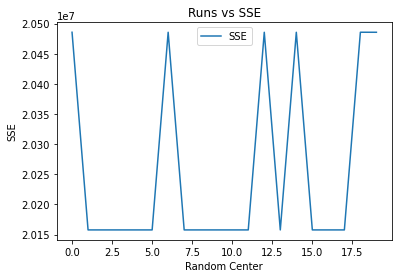

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=24 

Final Centroids: defaultdict(<class 'int'>, {0: array([-45.475487  ,  -0.39067215], dtype=float32), 1: array([ 14.363033, -45.96187 ], dtype=float32), 2: array([-4.291705, 52.6019  ], dtype=float32), 3: array([39.652237, 17.334932], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325, 1033, 4179]
Initial Cluster Centers

Iteration=1 

Euclidean
Mean 

Max Iteratins Run=41 

Final Centroids: defaultdict(<class 'int'>, {0: array([ 14.363033, -45.96187 ], dtype=float32), 1: array([-4.291705, 52.6019  ], dtype=float32), 2: array([39.652237, 17.334932], dtype=float32), 3: array([-45.475487  ,  -0.39067215], dtype=float32)})


Initial Cluster Center Indices 
 [926, 1500, 1390, 5915]
Initial Cluster Centers

Iteration=2 

Euclidean
Mean 

Max Iteratins Run=27 

Final Centroids: defaultdict(<class 'int'>, {0: array([-45.475487  ,  -0.39067215], dty

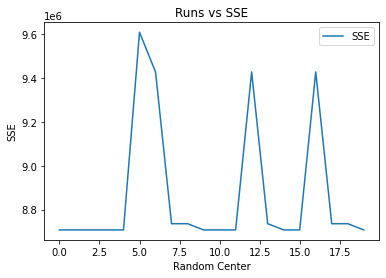

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=15 

Final Centroids: defaultdict(<class 'int'>, {0: array([-53.96662 ,   3.713738], dtype=float32), 1: array([ 37.875538, -37.06031 ], dtype=float32), 2: array([-2.3558743, 68.89254  ], dtype=float32), 3: array([50.62828, 34.23882], dtype=float32), 4: array([-12.688872, -48.92225 ], dtype=float32), 5: array([ 2.0979264, 15.387153 ], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325, 1033, 4179, 1931, 8117]
Initial Cluster Centers

Iteration=1 

Euclidean
Mean 

Max Iteratins Run=51 

Final Centroids: defaultdict(<class 'int'>, {0: array([ 37.875538, -37.06031 ], dtype=float32), 1: array([50.62828, 34.23882], dtype=float32), 2: array([ 2.105036, 15.375833], dtype=float32), 3: array([-12.688872, -48.92225 ], dtype=float32), 4: array([-53.96662 ,   3.713738], dtype=float32), 5: array([-2.3660321, 68.86813  ], dtype=float32)})


Initi

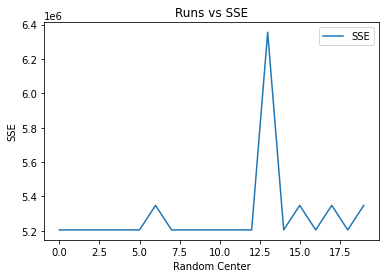

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961, 6634, 4969]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=38 

Final Centroids: defaultdict(<class 'int'>, {0: array([-56.847523,   9.254212], dtype=float32), 1: array([ 17.9434 , -50.61604], dtype=float32), 2: array([-2.089335, 71.35328 ], dtype=float32), 3: array([50.781017, 33.754116], dtype=float32), 4: array([-1.1392211, -0.456388 ], dtype=float32), 5: array([ 1.6749578, 30.228687 ], dtype=float32), 6: array([-28.596874, -43.57124 ], dtype=float32), 7: array([ 45.712437, -26.286324], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325, 1033, 4179, 1931, 8117, 7364, 7737]
Initial Cluster Centers

Iteration=1 

Euclidean
Mean 

Max Iteratins Run=17 

Final Centroids: defaultdict(<class 'int'>, {0: array([ 23.16861 , -50.607746], dtype=float32), 1: array([ 2.4994054, 15.2185   ], dtype=float32), 2: array([ 45.213062, -25.168941], dtype=float32), 3: array([-14.728522, -51.98787

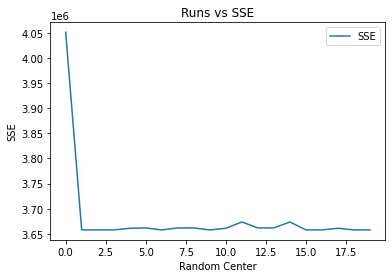

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961, 6634, 4969, 7808, 5866]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=119 

Final Centroids: defaultdict(<class 'int'>, {0: array([-51.100975,  25.725294], dtype=float32), 1: array([ 22.770323, -50.371834], dtype=float32), 2: array([-2.0588937, 71.394135 ], dtype=float32), 3: array([51.89208, 34.90557], dtype=float32), 4: array([-20.484133,  -6.715448], dtype=float32), 5: array([-1.6459932, 31.43107  ], dtype=float32), 6: array([-14.998998, -54.302193], dtype=float32), 7: array([19.255995 ,  3.9374158], dtype=float32), 8: array([-60.330273, -16.44391 ], dtype=float32), 9: array([ 48.1415, -27.6056], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325, 1033, 4179, 1931, 8117, 7364, 7737, 10675, 6219]
Initial Cluster Centers

Iteration=1 

Euclidean
Mean 

Max Iteratins Run=41 

Final Centroids: defaultdict(<class 'int'>, {0: array([17.265255, 17.992626], dtype=float32), 1: array(

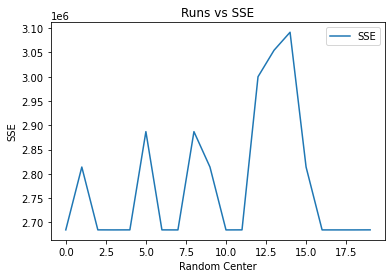

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961, 6634, 4969, 7808, 5866, 9558, 3578]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=21 

Final Centroids: defaultdict(<class 'int'>, {0: array([-51.20947 ,  25.626356], dtype=float32), 1: array([ 29.71897, -59.46529], dtype=float32), 2: array([-2.0607588, 71.412994 ], dtype=float32), 3: array([52.047554, 34.962112], dtype=float32), 4: array([20.277357,  7.824475], dtype=float32), 5: array([-2.13223 , 32.778023], dtype=float32), 6: array([-17.034784, -57.10505 ], dtype=float32), 7: array([ 11.245541, -35.275673], dtype=float32), 8: array([-42.450695, -23.462347], dtype=float32), 9: array([ 48.726532, -27.422207], dtype=float32), 10: array([-16.094547 ,   1.1078702], dtype=float32), 11: array([-70.959145, -10.669933], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325, 1033, 4179, 1931, 8117, 7364, 7737, 10675, 6219, 3439, 1537]
Initial Cluster Centers



KeyboardInterrupt: ignored

In [35]:
sse_2 = []
value1 = 20
iterations = np.arange(value1)
iterations1 = np.arange(2,21,2)
from collections import defaultdict
for K in range(2,21,2):
  sse_1 = []
  for rand_seed in range(value1):
    classes,centroids,cluster,iter=K_Means_predict(image_data_tsne,K,10000,rand_seed)
  # classes1,centroids1,cluster1,iter1=K_Means_predict1(image_data_tsne,10,10000,rand_seed)
  # classes2,centroids2,cluster2,iter2=K_Means_predict_man(image_data_tsne,10,10000,rand_seed)
  # classes3,centroids3,cluster3,iter3=K_Means_predict_man1(image_data_tsne,10,10000,rand_seed)
  # classes4,centroids4,cluster4,iter4=K_Means_predict_cos(image_data_tsne,10,10000,rand_seed)
  # classes5,centroids5,cluster5,iter5=K_Means_predict_cos1(image_data_tsne,10,10000,rand_seed)
    for i in range(0,10):
      classes[i]=np.array(classes[i]).tolist()
    # for i in range(0,10):
    #   classes1[i]=np.array(classes1[i]).tolist()
    print("Iteration=%d \n"%rand_seed)    
    print("Euclidean")
    print("Mean \n")
    print("Max Iteratins Run=%d \n"%iter)
    print("Final Centroids:",centroids)
    print("\n")
    SSE,count = sse_k(image_data_tsne,cluster,centroids,K)
    sse_1.append(SSE)
  print(sse_1)
  x = plt.subplot( )
  x.plot(iterations, sse_1, label='SSE')
  #x.plot(k_1, cv_auc, label='AUC CV')
  plt.title('Runs vs SSE')
  plt.xlabel('Random Center')
  plt.ylabel('SSE')
  x.legend()
  plt.show()
  sse_2.append(min(sse_1))

x = plt.subplot( )
x.plot(iterations1, sse_2, label='SSE')
#x.plot(k_1, cv_auc, label='AUC CV')
plt.title('K vs SSE')
plt.xlabel('K')
plt.ylabel('SSE')
x.legend()
plt.show()


  # for i in range(0,10):
  #  print("Cluster %d"%i,len(classes[i]))
  # print("Median \n")
  # print("Max Iteratins Run=%d \n"%iter1)
  # print("Final Centroids:",centroids1)
  # print("\n")  
  # for i in range(0,10):
  #   print("Cluster %d"%i,len(classes1[i]))
  # print("\n")
  # print("Manhattan")
  # print("Mean \n")
  # print("Max Iteratins Run=%d \n"%iter2)
  # print("Final Centroids:",centroids2)
  # print("\n")
  # for i in range(0,10):
  #   print("Cluster %d"%i,len(classes2[i]))
  # print("Median \n")
  # print("Max Iteratins Run=%d \n"%iter3)
  # print("Final Centroids:",centroids3)
  # print("\n")  
  # for i in range(0,10):
  #   print("Cluster %d"%i,len(classes3[i]))
  # print("\n")
  # print("Cosine")
  # print("Mean \n")
  # print("Max Iteratins Run=%d \n"%iter4)
  # print("Final Centroids:",centroids4)
  # print("\n")
  # for i in range(0,10):
  #   print("Cluster %d"%i,len(classes4[i]))
  # print("Median \n")
  # print("Max Iteratins Run=%d \n"%iter5)
  # #print("Final Centroids:",centroids5)
  # print("\n")  
  # for i in range(0,10):
  #   print("Cluster %d"%i,len(classes5[i]))
  #print("\n")
  #print("**********XXXXX********")
  #print(centroids)

In [ ]:
# pca1 = PCA(n_components=10)
# image_data_pca1 = pca.fit_transform(image_data)

In [ ]:
rand_seed = 0
classes,centroids,cluster,iter=K_Means_predict(image_data_umap,10,10000,rand_seed)
for i in range(0,10):
  classes[i]=np.array(classes[i]).tolist()
  
for i in range(0,10):
  print(len(classes[i]))

In [ ]:
print(iter)

In [ ]:
# for i in range(0,10):
#     classes[i]=np.array(classes[i]).tolist()
    
# for i in range(0,10):
#     print(len(classes[i]))
# #print(centroids)

In [ ]:
print(cluster)

In [ ]:
with open('image_cluster75.txt', 'w') as f:
  for i in cluster:
    f.write(str(i) +"\n")

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# image_data_sc = scaler.fit_transform(image_data)
# #print(scaler.mean_)

In [ ]:
# image_data_pca.shape

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set(style='whitegrid')
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=152, ymin=0, ymax=1)
# display(plt.show())
# evr = pca.explained_variance_ratio_
# cvr = np.cumsum(pca.explained_variance_ratio_)
# pca_df = pd.DataFrame()
# pca_df['Cumulative Variance Ratio'] = cvr
# pca_df['Explained Variance Ratio'] = evr
# display(pca_df.head(152))

In [ ]:
# classes,centroids,cluster=K_Means_predict(image_data_pca,10,10000)

In [ ]:
# for i in range(0,10):
#     classes[i]=np.array(classes[i]).tolist()
    
# for i in range(0,10):
#     print(len(classes[i]))
# #print(centroids)

In [ ]:
# print(cluster)

In [ ]:
# with open('image_cluster67.txt', 'w') as f:
#   for i in cluster:
#     f.write(str(i) +"\n")

In [ ]:
# #image_data = image_data.astype('float32') 
# #image_data = image_data / 255.0
# image_data_1 = image_data.to_numpy()

In [ ]:
# image_data_1.shape

In [ ]:
# for rand_seed in range(100):  
#   classes,centroids,cluster,iter=K_Means_predict(image_data_tsne,10,10000,rand_seed)
#   for i in range(0,10):
#       classes[i]=np.array(classes[i]).tolist()
#   values = []  
#   for i in range(0,10):
#       values.append(len(classes[i]))
#   print(values)
  # print("\n")

# classes,centroids,cluster=K_Means_predict(image_data_1,10,10000,10)
# for i in range(0,10):
#     classes[i]=np.array(classes[i]).tolist()
# values = []  
# for i in range(0,10):
#     values.append(len(classes[i]))
# print(values)
# print("\n")

In [ ]:
# print(cluster)

In [ ]:
# with open('image_cluster76.txt', 'w') as f:
#   for i in cluster:
#     f.write(str(i) +"\n")

In [ ]:
# from sklearn.manifold import TSNE

# model = TSNE(n_components=2, random_state=0,metric = 'cosine')
# image_data_tsne = model.fit_transform(image_data_np)

In [ ]:
# for rand_seed in range(100):  
#   classes,centroids,cluster,iter=K_Means_predict_cos1(image_data_tsne,10,10000,rand_seed)
#   print("Iteration = %i"%rand_seed)
#   print("Iter %i"%iter)
#   for i in range(0,10):
#       classes[i]=np.array(classes[i]).tolist()
#   values = []  
#   for i in range(0,10):
#       values.append(len(classes[i]))
#   print(values)
#   print("\n")

# # classes,centroids,cluster=K_Means_predict(image_data_1,10,10000,10)
# # for i in range(0,10):
# #     classes[i]=np.array(classes[i]).tolist()
# # values = []  
# # for i in range(0,10):
# #     values.append(len(classes[i]))
# # print(values)
# # print("\n")

In [ ]:
# from sklearn.manifold import MDS
# embedding = MDS(n_components=2)

# image_data_mds = embedding.fit_transform(image_data_np)

In [ ]:
# for rand_seed in range(100):  
#   classes,centroids,cluster,iter=K_Means_predict(image_data_tsne,10,10000,rand_seed)
#   print("Iteration = %i"%rand_seed)
#   print("Iter %i"%iter)
#   for i in range(0,10):
#       classes[i]=np.array(classes[i]).tolist()
#   values = []  
#   for i in range(0,10):
#       values.append(len(classes[i]))
#   print(values)
#   print("\n")

# # classes,centroids,cluster=K_Means_predict(image_data_1,10,10000,10)
# # for i in range(0,10):
# #     classes[i]=np.array(classes[i]).tolist()
# # values = []  
# # for i in range(0,10):
# #     values.append(len(classes[i]))
# # print(values)
# # print("\n")

In [ ]:
# image_data_mds

Initial Cluster Center Indices 
 [6311, 6890]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=18 

Final Centroids: defaultdict(<class 'int'>, {0: array([5.121873, 6.371195], dtype=float32), 1: array([11.637527 ,  2.0725706], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325]
Initial Cluster Centers

Iteration=1 

Euclidean
Mean 

Max Iteratins Run=19 

Final Centroids: defaultdict(<class 'int'>, {0: array([11.637527 ,  2.0725706], dtype=float32), 1: array([5.121873, 6.371195], dtype=float32)})


Initial Cluster Center Indices 
 [926, 1500]
Initial Cluster Centers

Iteration=2 

Euclidean
Mean 

Max Iteratins Run=8 

Final Centroids: defaultdict(<class 'int'>, {0: array([9.649637, 4.946453], dtype=float32), 1: array([-0.27039605,  3.9864993 ], dtype=float32)})


Initial Cluster Center Indices 
 [3898, 9709]
Initial Cluster Centers

Iteration=3 

Euclidean
Mean 

Max Iteratins Run=18 

Final Centroids: defaultdict(<class 'int'>, {0: array([10.3249

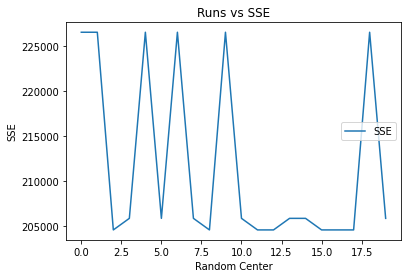

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=12 

Final Centroids: defaultdict(<class 'int'>, {0: array([10.198165, 10.01198 ], dtype=float32), 1: array([11.555018 ,  1.1677057], dtype=float32), 2: array([-0.3943271,  4.014026 ], dtype=float32), 3: array([6.457588 , 5.3647985], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325, 1033, 4179]
Initial Cluster Centers

Iteration=1 

Euclidean
Mean 

Max Iteratins Run=19 

Final Centroids: defaultdict(<class 'int'>, {0: array([12.303523 ,  2.6609685], dtype=float32), 1: array([1.4766238, 3.991745 ], dtype=float32), 2: array([10.886183  , -0.16664967], dtype=float32), 3: array([8.980245, 8.534401], dtype=float32)})


Initial Cluster Center Indices 
 [926, 1500, 1390, 5915]
Initial Cluster Centers

Iteration=2 

Euclidean
Mean 

Max Iteratins Run=18 

Final Centroids: defaultdict(<class 'int'>, {0: array([6.457588 , 5.3647985], dtype=float32), 1

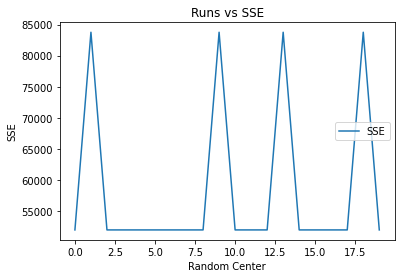

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=13 

Final Centroids: defaultdict(<class 'int'>, {0: array([10.213316, 10.060181], dtype=float32), 1: array([11.555018 ,  1.1677057], dtype=float32), 2: array([-2.5374048,  3.303866 ], dtype=float32), 3: array([1.5513293, 4.6623516], dtype=float32), 4: array([5.4771795, 3.901897 ], dtype=float32), 5: array([7.167061, 6.339183], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325, 1033, 4179, 1931, 8117]
Initial Cluster Centers

Iteration=1 

Euclidean
Mean 

Max Iteratins Run=21 

Final Centroids: defaultdict(<class 'int'>, {0: array([12.439524 ,  0.8672593], dtype=float32), 1: array([6.4620156, 5.3670926], dtype=float32), 2: array([10.189344 , -0.2939826], dtype=float32), 3: array([12.171616 ,  3.4568996], dtype=float32), 4: array([10.162686 , 10.0592785], dtype=float32), 5: array([-0.3943271,  4.014026 ], dtype=float32)})


Initial

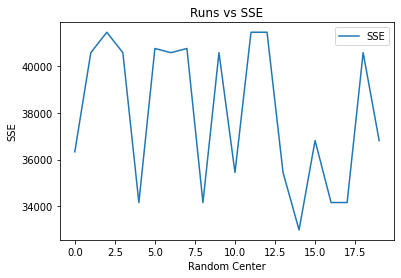

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961, 6634, 4969]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=14 

Final Centroids: defaultdict(<class 'int'>, {0: array([10.175004, 10.104728], dtype=float32), 1: array([12.156976 ,  3.4736953], dtype=float32), 2: array([-2.5374048,  3.303866 ], dtype=float32), 3: array([1.5513293, 4.6623516], dtype=float32), 4: array([5.4771795, 3.901897 ], dtype=float32), 5: array([7.167061, 6.339183], dtype=float32), 6: array([12.471604  ,  0.89571756], dtype=float32), 7: array([10.213654  , -0.28456947], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325, 1033, 4179, 1931, 8117, 7364, 7737]
Initial Cluster Centers

Iteration=1 

Euclidean
Mean 

Max Iteratins Run=21 

Final Centroids: defaultdict(<class 'int'>, {0: array([12.439524 ,  0.8672593], dtype=float32), 1: array([6.471463, 5.366184], dtype=float32), 2: array([10.189344 , -0.2939826], dtype=float32), 3: array([12.171616 ,  3.4568996], 

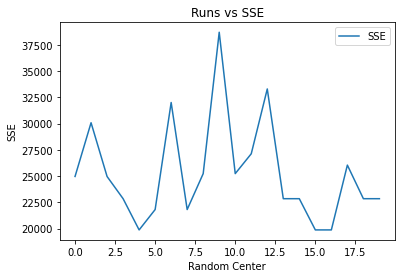

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961, 6634, 4969, 7808, 5866]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=18 

Final Centroids: defaultdict(<class 'int'>, {0: array([8.172811, 9.932819], dtype=float32), 1: array([12.10303  ,  3.3996544], dtype=float32), 2: array([-2.5374048,  3.303866 ], dtype=float32), 3: array([1.5513293, 4.6623516], dtype=float32), 4: array([5.4771795, 3.901897 ], dtype=float32), 5: array([7.1653843, 6.3353443], dtype=float32), 6: array([12.387654 ,  1.5822072], dtype=float32), 7: array([12.481819  , -0.22283679], dtype=float32), 8: array([11.788572, 10.155071], dtype=float32), 9: array([10.125628, -0.271896], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325, 1033, 4179, 1931, 8117, 7364, 7737, 10675, 6219]
Initial Cluster Centers

Iteration=1 

Euclidean
Mean 

Max Iteratins Run=50 

Final Centroids: defaultdict(<class 'int'>, {0: array([11.408683 ,  1.6882373], dtype=float32), 1: array([6.

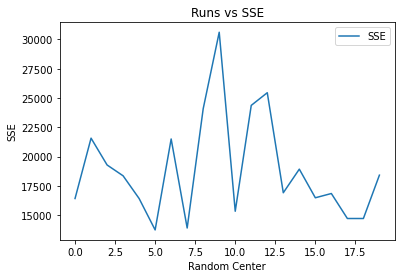

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961, 6634, 4969, 7808, 5866, 9558, 3578]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=19 

Final Centroids: defaultdict(<class 'int'>, {0: array([8.174412, 9.934507], dtype=float32), 1: array([12.10303  ,  3.3996544], dtype=float32), 2: array([-2.5374048,  3.303866 ], dtype=float32), 3: array([1.5513293, 4.6623516], dtype=float32), 4: array([5.5103326, 3.3653693], dtype=float32), 5: array([5.9350595, 6.284096 ], dtype=float32), 6: array([12.387654 ,  1.5822072], dtype=float32), 7: array([12.481819  , -0.22283679], dtype=float32), 8: array([11.996367,  8.696808], dtype=float32), 9: array([10.125628, -0.271896], dtype=float32), 10: array([8.437453, 6.043645], dtype=float32), 11: array([11.542177, 11.90521 ], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325, 1033, 4179, 1931, 8117, 7364, 7737, 10675, 6219, 3439, 1537]
Initial Cluster Centers

Iteration=1 

Euclidean
Mean 

Max Itera

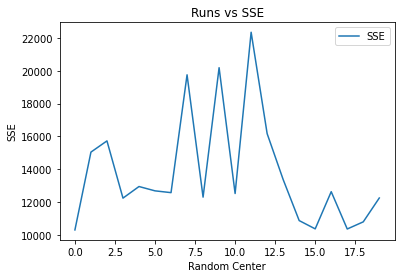

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961, 6634, 4969, 7808, 5866, 9558, 3578, 8268, 2281]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=28 

Final Centroids: defaultdict(<class 'int'>, {0: array([8.174412, 9.934507], dtype=float32), 1: array([12.10303  ,  3.3996544], dtype=float32), 2: array([-2.5374048,  3.303866 ], dtype=float32), 3: array([1.1041998, 3.5820827], dtype=float32), 4: array([5.421913 , 2.7268825], dtype=float32), 5: array([6.1116996, 6.685005 ], dtype=float32), 6: array([12.387654 ,  1.5822072], dtype=float32), 7: array([12.481819  , -0.22283679], dtype=float32), 8: array([11.996367,  8.696808], dtype=float32), 9: array([10.125628, -0.271896], dtype=float32), 10: array([8.441409, 6.038837], dtype=float32), 11: array([11.542177, 11.90521 ], dtype=float32), 12: array([5.594783 , 4.9120846], dtype=float32), 13: array([1.8539706, 5.393537 ], dtype=float32)})


Initial Cluster Center Indices 
 [2201, 9325, 1033, 4179, 19

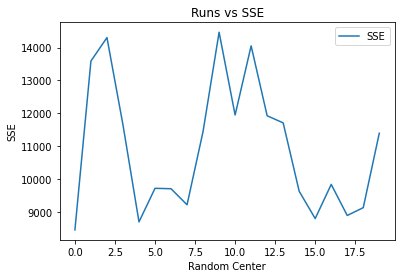

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961, 6634, 4969, 7808, 5866, 9558, 3578, 8268, 2281, 4617, 2289]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=26 

Final Centroids: defaultdict(<class 'int'>, {0: array([8.174244, 9.936335], dtype=float32), 1: array([10.855737 ,  1.4514918], dtype=float32), 2: array([-2.5374048,  3.303866 ], dtype=float32), 3: array([1.1041998, 3.5820827], dtype=float32), 4: array([5.4159718, 2.7127824], dtype=float32), 5: array([6.011448 , 6.7264576], dtype=float32), 6: array([12.787768 ,  1.6719462], dtype=float32), 7: array([12.468751  , -0.22201212], dtype=float32), 8: array([8.862988, 6.329464], dtype=float32), 9: array([10.010548 , -0.5418166], dtype=float32), 10: array([7.5651836, 5.6913447], dtype=float32), 11: array([11.542177, 11.90521 ], dtype=float32), 12: array([5.557114, 4.870901], dtype=float32), 13: array([1.8539706, 5.393537 ], dtype=float32), 14: array([12.381566,  3.540969], dtype=float32), 1

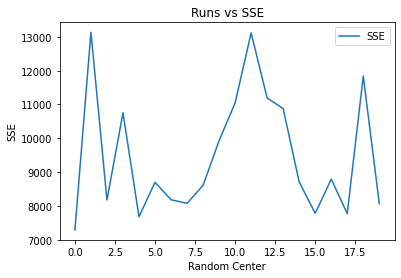

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961, 6634, 4969, 7808, 5866, 9558, 3578, 8268, 2281, 4617, 2289, 1553, 10131]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=21 

Final Centroids: defaultdict(<class 'int'>, {0: array([ 7.5856557, 10.257944 ], dtype=float32), 1: array([11.064562,  3.027379], dtype=float32), 2: array([-2.5374048,  3.303866 ], dtype=float32), 3: array([1.1041998, 3.5820827], dtype=float32), 4: array([5.4159718, 2.7127824], dtype=float32), 5: array([6.011448 , 6.7264576], dtype=float32), 6: array([12.60316  ,  1.6375029], dtype=float32), 7: array([12.525093  , -0.22390316], dtype=float32), 8: array([8.865226 , 6.3218536], dtype=float32), 9: array([10.544082 ,  0.5661702], dtype=float32), 10: array([7.5651836, 5.6913447], dtype=float32), 11: array([8.754536, 9.61232 ], dtype=float32), 12: array([5.557114, 4.870901], dtype=float32), 13: array([1.8539706, 5.393537 ], dtype=float32), 14: array([12.728691 ,  3.6051347], 

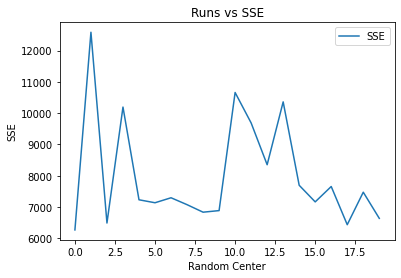

Initial Cluster Center Indices 
 [6311, 6890, 663, 4242, 8376, 7961, 6634, 4969, 7808, 5866, 9558, 3578, 8268, 2281, 4617, 2289, 1553, 10131, 4104, 8725]
Initial Cluster Centers

Iteration=0 

Euclidean
Mean 

Max Iteratins Run=35 

Final Centroids: defaultdict(<class 'int'>, {0: array([ 7.5856557, 10.257944 ], dtype=float32), 1: array([11.064562,  3.027379], dtype=float32), 2: array([-2.5374048,  3.303866 ], dtype=float32), 3: array([1.1041998, 3.5820827], dtype=float32), 4: array([5.2921553, 2.4977403], dtype=float32), 5: array([5.41723  , 5.4885645], dtype=float32), 6: array([12.60316  ,  1.6375029], dtype=float32), 7: array([12.525093  , -0.22390316], dtype=float32), 8: array([7.81334  , 5.5996423], dtype=float32), 9: array([10.544082 ,  0.5661702], dtype=float32), 10: array([6.515515 , 6.3185782], dtype=float32), 11: array([8.754536, 9.61232 ], dtype=float32), 12: array([5.747277, 4.113364], dtype=float32), 13: array([1.8539706, 5.393537 ], dtype=float32), 14: array([12.728691 ,  

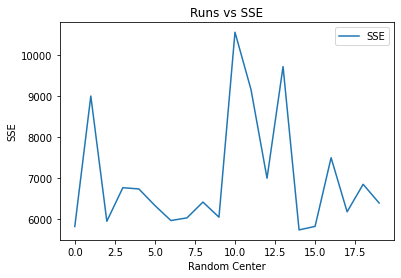

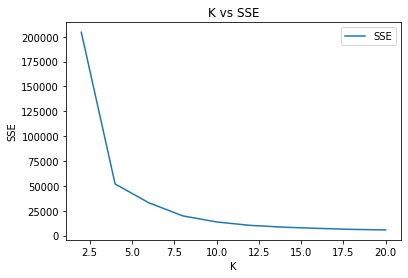

In [40]:
sse_2 = []
value1 = 20
iterations = np.arange(value1)
iterations1 = np.arange(2,21,2)
from collections import defaultdict
for K in range(2,21,2):
  sse_1 = []
  for rand_seed in range(value1):
    classes,centroids,cluster,iter=K_Means_predict(image_data_umap,K,10000,rand_seed)
  # classes1,centroids1,cluster1,iter1=K_Means_predict1(image_data_tsne,10,10000,rand_seed)
  # classes2,centroids2,cluster2,iter2=K_Means_predict_man(image_data_tsne,10,10000,rand_seed)
  # classes3,centroids3,cluster3,iter3=K_Means_predict_man1(image_data_tsne,10,10000,rand_seed)
  # classes4,centroids4,cluster4,iter4=K_Means_predict_cos(image_data_tsne,10,10000,rand_seed)
  # classes5,centroids5,cluster5,iter5=K_Means_predict_cos1(image_data_tsne,10,10000,rand_seed)
    for i in range(0,10):
      classes[i]=np.array(classes[i]).tolist()
    # for i in range(0,10):
    #   classes1[i]=np.array(classes1[i]).tolist()
    print("Iteration=%d \n"%rand_seed)    
    print("Euclidean")
    print("Mean \n")
    print("Max Iteratins Run=%d \n"%iter)
    print("Final Centroids:",centroids)
    print("\n")
    SSE,count = sse_k(image_data_umap,cluster,centroids,K)
    sse_1.append(SSE)
  print(sse_1)
  x = plt.subplot( )
  x.plot(iterations, sse_1, label='SSE')
  #x.plot(k_1, cv_auc, label='AUC CV')
  plt.title('Runs vs SSE')
  plt.xlabel('Random Center')
  plt.ylabel('SSE')
  x.legend()
  plt.show()
  sse_2.append(min(sse_1))

x = plt.subplot( )
x.plot(iterations1, sse_2, label='SSE')
#x.plot(k_1, cv_auc, label='AUC CV')
plt.title('K vs SSE')
plt.xlabel('K')
plt.ylabel('SSE')
x.legend()
plt.show()


  # for i in range(0,10):
  #  print("Cluster %d"%i,len(classes[i]))
  # print("Median \n")
  # print("Max Iteratins Run=%d \n"%iter1)
  # print("Final Centroids:",centroids1)
  # print("\n")  
  # for i in range(0,10):
  #   print("Cluster %d"%i,len(classes1[i]))
  # print("\n")
  # print("Manhattan")
  # print("Mean \n")
  # print("Max Iteratins Run=%d \n"%iter2)
  # print("Final Centroids:",centroids2)
  # print("\n")
  # for i in range(0,10):
  #   print("Cluster %d"%i,len(classes2[i]))
  # print("Median \n")
  # print("Max Iteratins Run=%d \n"%iter3)
  # print("Final Centroids:",centroids3)
  # print("\n")  
  # for i in range(0,10):
  #   print("Cluster %d"%i,len(classes3[i]))
  # print("\n")
  # print("Cosine")
  # print("Mean \n")
  # print("Max Iteratins Run=%d \n"%iter4)
  # print("Final Centroids:",centroids4)
  # print("\n")
  # for i in range(0,10):
  #   print("Cluster %d"%i,len(classes4[i]))
  # print("Median \n")
  # print("Max Iteratins Run=%d \n"%iter5)
  # #print("Final Centroids:",centroids5)
  # print("\n")  
  # for i in range(0,10):
  #   print("Cluster %d"%i,len(classes5[i]))
  #print("\n")
  #print("**********XXXXX********")
  #print(centroids)

In [38]:
rand_seed = 7
classes,centroids,cluster,iter=K_Means_predict(image_data_umap,10,10000,rand_seed)
for i in range(0,10):
  classes[i]=np.array(classes[i]).tolist()
  
for i in range(0,10):
  print(len(classes[i]))

Initial Cluster Center Indices 
 [5305, 2471, 6468, 10664, 791, 1186, 8779, 1542, 5991, 9548]
Initial Cluster Centers

727
1610
606
1259
1035
1035
1034
1043
1239
1152


In [ ]:
print(cluster)

In [39]:
sse,count = sse_k(image_data_umap,cluster,centroids,10)
sse

13906.364499279669

In [ ]:
with open('image_cluster95.txt', 'w') as f:
  for i in cluster:
    f.write(str(i) +"\n")